# Decision Tree Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns 

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values



## Training the Decision Tree Regression model on the whole dataset

In [4]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [5]:
y_pred = regressor.predict(X)

df = pd.DataFrame(list(zip(y, y_pred)),
     columns =['y', 'y_pred'])
df1 = df.sort_values(by = ['y', 'y_pred'], ascending = True)

df1

,y,y_pred
0,45000,45000.0
1,50000,50000.0
2,60000,60000.0
3,80000,80000.0
4,110000,110000.0
5,150000,150000.0
6,200000,200000.0
7,300000,300000.0
8,500000,500000.0
9,1000000,1000000.0


In [6]:
ypred = regressor.predict([[6.6]])

ypred

array([200000.])

## Visualising the Decision Tree Regression results 

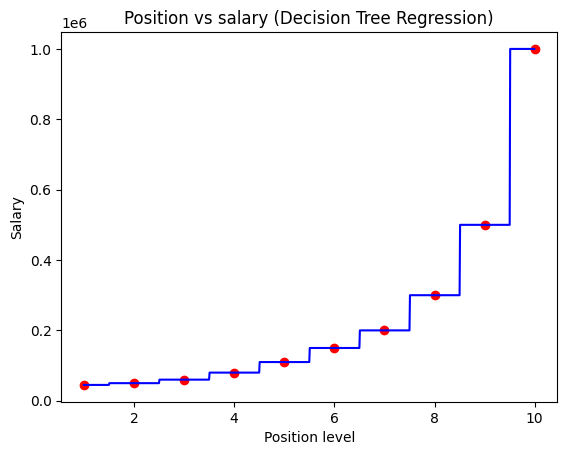

In [7]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Position vs salary (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
r2_train = r2_score(y,y_pred )
r2_train

1.0

In [9]:
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['position level']) 

## Resumen
Aunque pareciera que el resultado del modelo es bueno, la realidad es que esto solo esta dado ya que al calcualr el valor de las predicciones en rangos, estamos obteniendo exactamemnte los mimso valores, no obtsante, lo demas valores van a cargar con el error que posee el modelo al no tener variaciones en dichos rangos